<h1>Visualizing Dyads</h1>

In [679]:
import skimage.data
import matplotlib.pyplot as plt
import numpy as np

X = skimage.data.camera()



m, n = X.shape
print(f"The shape of A is: {(m, n)}.")

print(f"Rank of A is: {np.linalg.matrix_rank(X)}")

U,s,VT = np.linalg.svd(X, full_matrices=True)
print(U.shape, s.shape, VT.shape)


The shape of A is: (512, 512).
Rank of A is: 512
(512, 512) (512,) (512, 512)


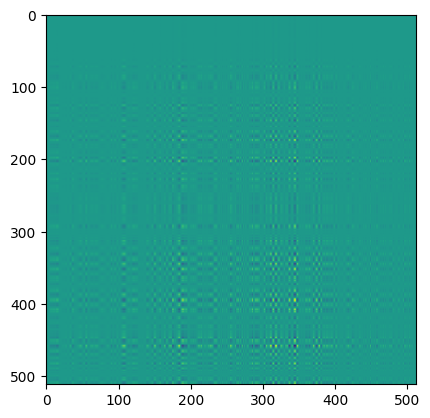

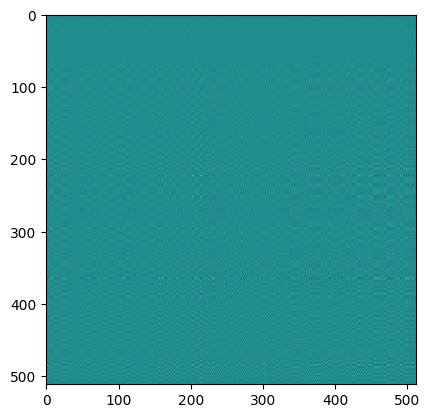

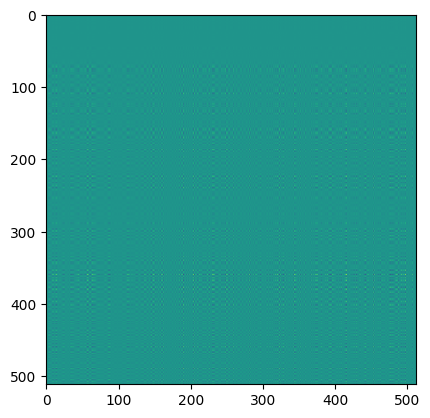

In [680]:
k= np.arange(50, 200, 50)

dyod=None

for i in k:
  dyod=s[i]*U[:,i:i+1]@VT[i:i+1]
  plt.imshow(dyod)
  plt.show()


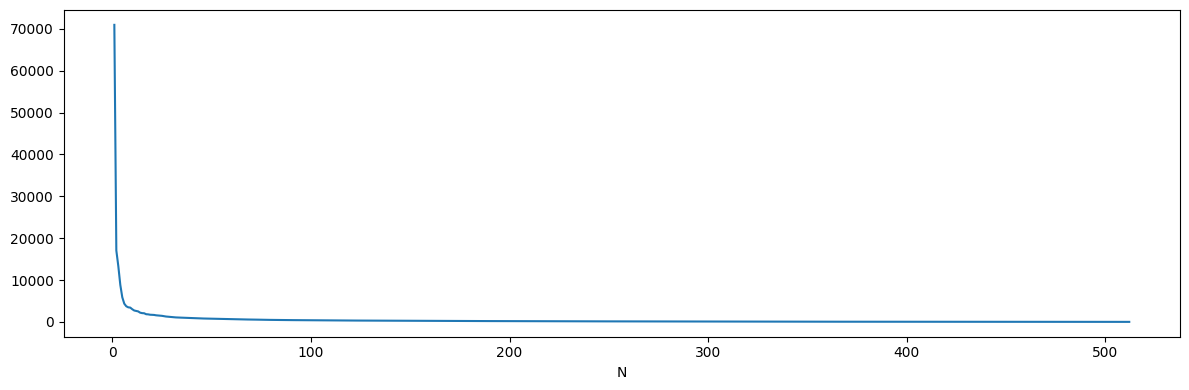

In [681]:
k=np.arange(1, len(s)+1, 1)

def plot(s, n):
  plt.figure(figsize=(12, 4))
  plt.xlabel('N')
  plt.plot(n, s)
  plt.tight_layout()
  plt.show()

plot(s,k)


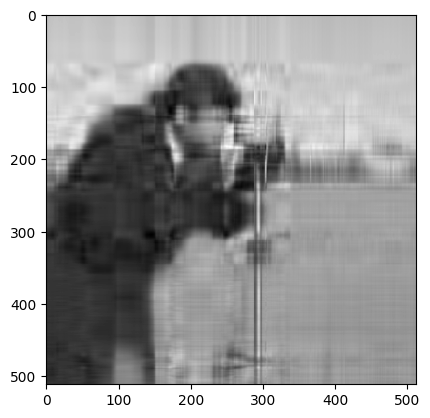

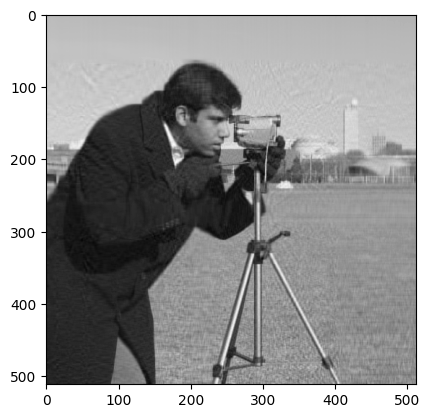

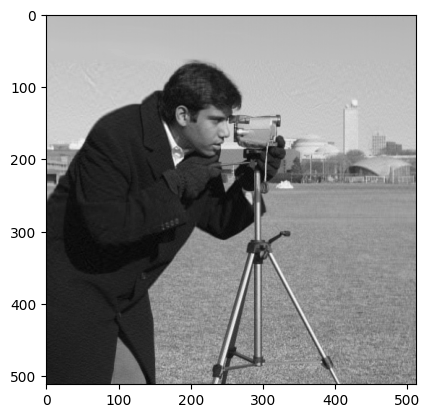

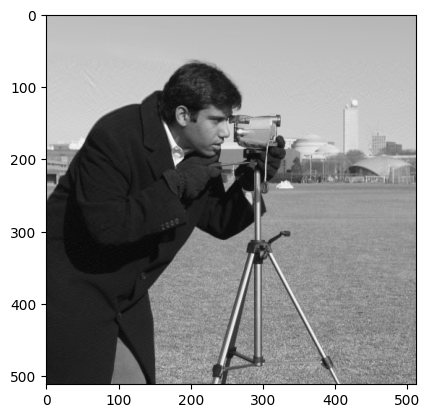

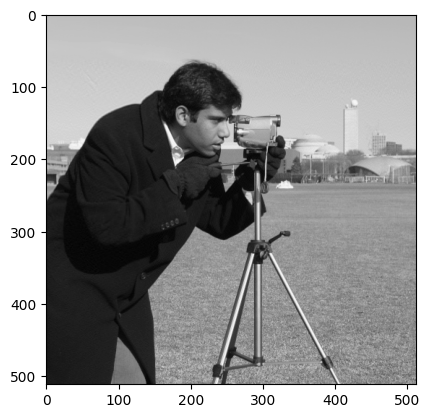

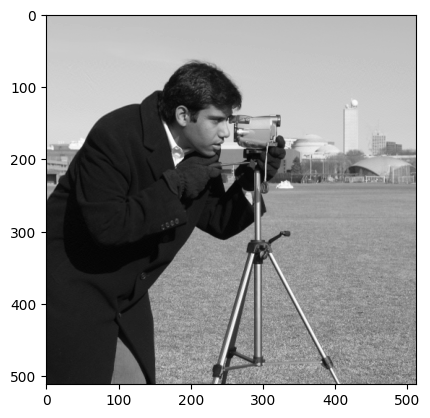

In [682]:
S=np.zeros((m,n))
S[:n,:n]=np.diag(s)
k=np.arange(0,501,2)


#plt.imshow(X, cmap="gray")
#plt.show()

for i in np.arange(10,300,50):
  X_k=U[:, :i]@ S[:i,:i] @ VT[:i,:]
  plt.imshow(X_k, cmap="gray")
  plt.show()


c_ks=[]
rel_errs=[]
for i in k:
  X_k=U[:, :i]@ S[:i,:i] @ VT[:i,:]

  rel_err= np.linalg.norm(X-X_k, 'fro')#/np.linalg.norm(X)
  c_k= 1 - i*(1+m+n)/ (m*n)

  rel_errs.append(rel_err)
  c_ks.append(c_k)




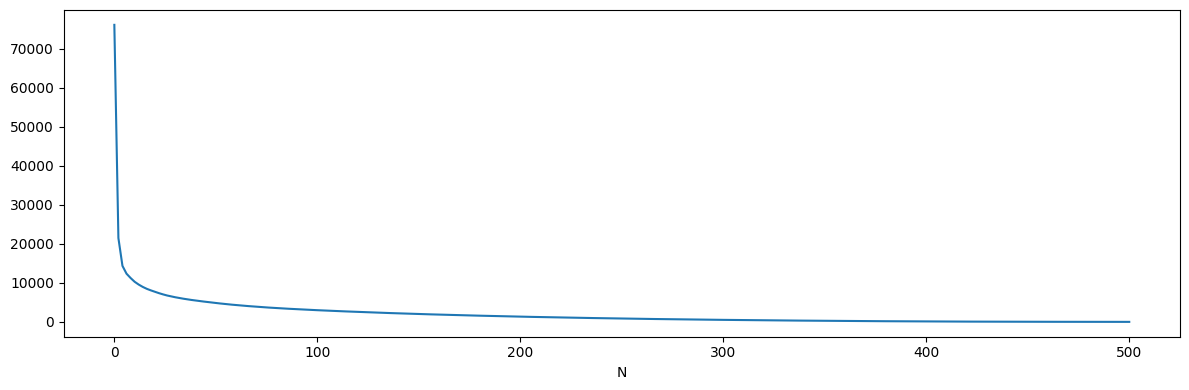

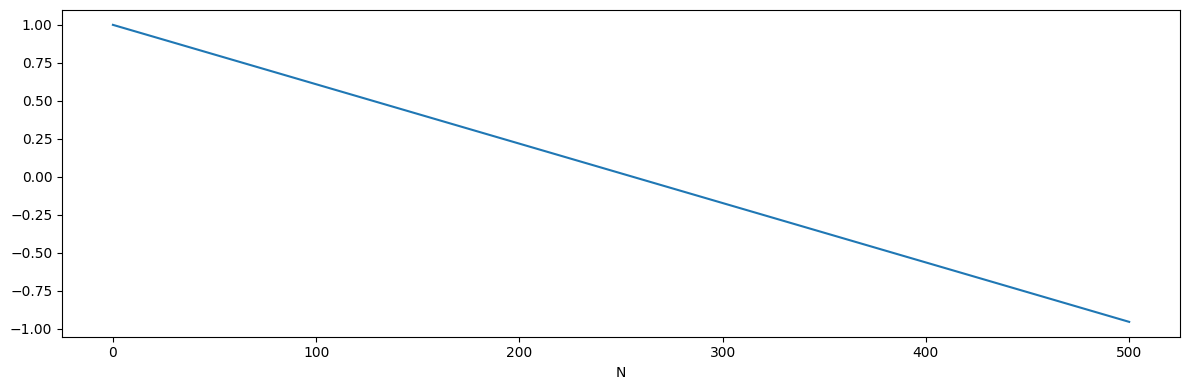

In [683]:
plot(rel_errs, k)
plot(c_ks, k)

<h1>Classification with SVD</h1>

In [684]:
import scipy
data = scipy.io.loadmat('MNIST.mat')

X = data["X"]
I = data["I"].T

a = 3
b = 0
c = 8

d, N = X.shape
print(X.shape)

(256, 1707)


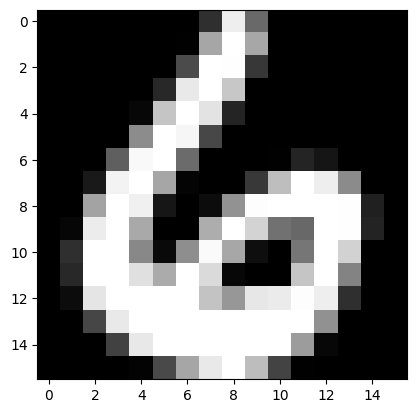


The associated digit is: [6]


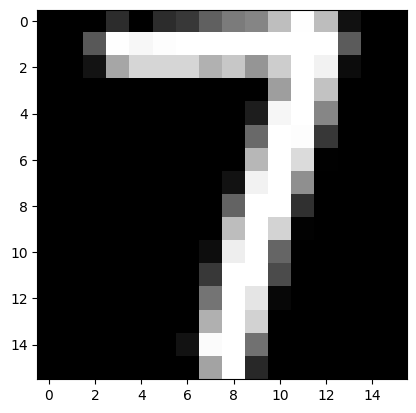


The associated digit is: [7]


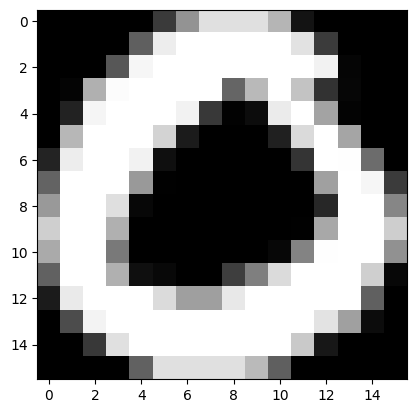


The associated digit is: [0]


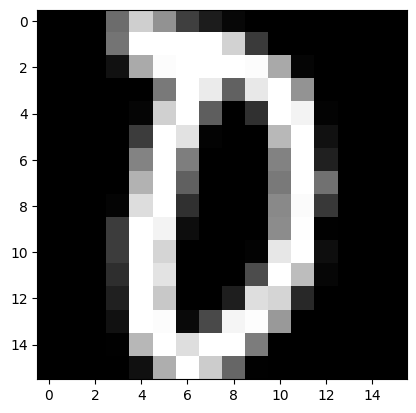


The associated digit is: [0]


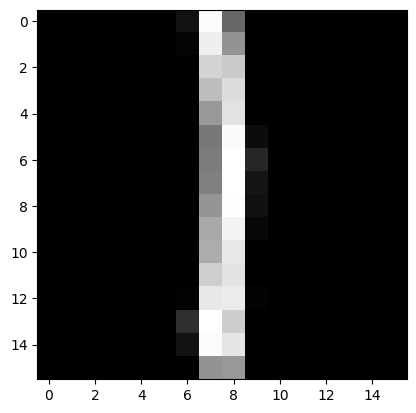


The associated digit is: [1]


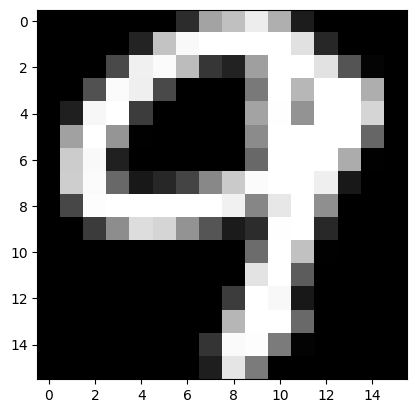


The associated digit is: [9]


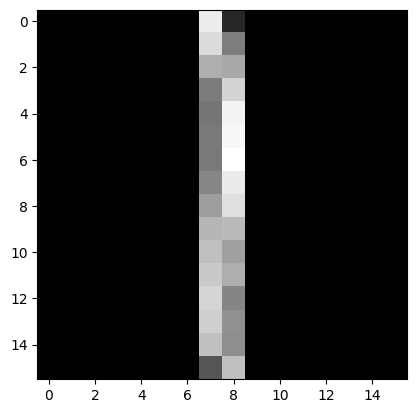


The associated digit is: [1]


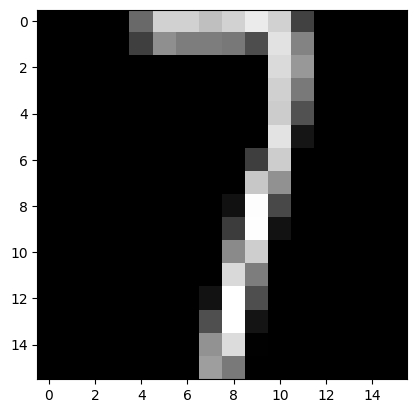


The associated digit is: [7]


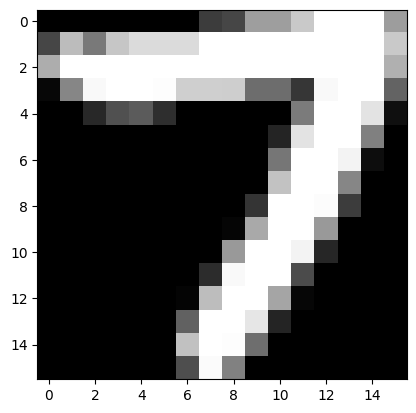


The associated digit is: [7]


In [685]:
def visualize(X, idx):
    # Visualize the image of index 'idx' from the dataset 'X'

    # Load an image in memory
    img = X[:, idx]

    # Reshape it
    img = np.reshape(img, (16, 16))

    # Visualize
    plt.imshow(img, cmap='gray')
    plt.show()

# Visualize a bunch of datapoints of X
for idx in np.arange(0, N, 200):
    visualize(X, idx)
    print(f"\nThe associated digit is: {I[idx]}")

In [686]:
idx = (I[:, 0] == a) | (I[:, 0] == b) | (I[:, 0] == c)
I = I[idx, :]
X = X[:, idx]

# Split the obtained dataset in training and testing.
def split_data(X, Y, Ntrain):
    d, N = X.shape

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx] #prendi solo la prima colonna

    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return (Xtrain, Ytrain), (Xtest, Ytest)

# Test it
(Xtrain, Ytrain), (Xtest, Ytest) = split_data(X, I, 200)

print(Xtrain.shape, Xtest.shape)

(256, 200) (256, 394)


In [687]:
idx = (I[:, 0] == a) | (I[:, 0] == b) | (I[:, 0] == c)
I = I[idx, :]
X = X[:, idx]

idx = (Ytrain[:, 0] == a)
Y1train = Ytrain[idx, :]
X1train = Xtrain[:, idx]

idx = (Ytrain[:, 0] == b)
Y2train = Ytrain[idx, :]
X2train = Xtrain[:, idx]

idx = (Ytrain[:, 0] == c)
Y3train = Ytrain[idx, :]
X3train = Xtrain[:, idx]

def SVD(M):
    U, s, VT = np.linalg.svd(M, full_matrices=False)
    return U

U1 = SVD(X1train)
U2 = SVD(X2train)
U3 = SVD(X3train)

print(U1.shape, U2.shape, U3.shape)

(256, 46) (256, 110) (256, 44)


In [688]:
def distances(y, U):
    yp = U @ (U.T @ y)
    d = np.linalg.norm(y-yp)
    return d

# Repeat the experiment for different values of y in the test set and find the ACCURACY
inP = 0
num = Xtest.shape[1]

for i in np.arange(Xtest.shape[1]):
    y = i
    unknown = Xtest[:, y]

    d1 = distances(unknown, U1)
    d2 = distances(unknown, U2)
    d3 = distances(unknown, U3)

    if(d1<d2 and d1<d3): # prediction a
        if (Ytest[y] != a): inP = inP + 1
    elif (d2<d3 and d2<d1): # prediction b
        if (Ytest[y] != b): inP = inP + 1
    elif (d3<d1 and d3<d2):
        if (Ytest[y] != c): inP = inP + 1

print(inP, num)
print(f"Accuracy on test set: {1 - inP/num}")

46 394
Accuracy on test set: 0.883248730964467


In [689]:
inP = 0

for i in np.arange(Xtrain.shape[1]):
    y = i
    unknown = Xtrain[:, y]

    d1 = distances(unknown, U1)
    d2 = distances(unknown, U2)
    d3 = distances(unknown, U3)

    if(d1<d2 and d1<d3): # prediction a
        if (Ytrain[y] != a): inP = inP + 1
    elif (d2<d3 and d2<d1): # prediction b
        if (Ytrain[y] != b): inP = inP + 1
    elif (d3<d1 and d3<d2):
        if (Ytrain[y] != c): inP = inP + 1

print(inP, Xtrain.shape[1])
print(f"Accuracy on train set: {1 - inP/Xtrain.shape[1]}")

0 200
Accuracy on train set: 1.0


<h1>Clustering with PCA</h1>

In [690]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

In [691]:
# Load data into memory
data = pd.read_csv('data.csv')
print(f"Shape of the data: {data.shape}\n")

data = np.array(data)
Y = data[:, :1]
X = data[:, 1:].T
d, N = X.shape
print(f"Shape of data: {X.shape}, {Y.shape}")


Shape of the data: (42000, 785)

Shape of data: (784, 42000), (42000, 1)


In [692]:
a = 3
b = 2
c = 4

idx = (Y[:, 0] == a) | (Y[:, 0] == b) | (Y[:, 0] == c)
Y = Y[idx, :]
X = X[:, idx]
d, N = X.shape
print(f"Shape only with digits ({a},{b},{c},) : {X.shape}, {Y.shape}")

def split_data(X, Y, Ntrain):
    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx]

    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return (Xtrain, Ytrain), (Xtest, Ytest)

Ntrain = int(0.8*N)
(Xtrain, Ytrain), (Xtest, Ytest) = split_data(X, Y, Ntrain)
print(f"Shape of train set: {Xtrain.shape}, {Xtest.shape}")

def split(X, Y, l):
    idx = (Y[:, 0] == l)
    Yl = Y[idx, :]
    Xl = X[:, idx]
    return Xl, Yl

X1train, Y1train = split(Xtrain, Ytrain, a)
X2train, Y2train = split(Xtrain, Ytrain, b)
X3train, Y3train = split(Xtrain, Ytrain, c)
print(f"Shape of the three train set: {X1train.shape}, {X2train.shape}, {X3train.shape}")

Shape only with digits (3,2,4,) : (784, 12600), (12600, 1)
Shape of train set: (784, 10080), (784, 2520)
Shape of the three train set: (784, 3472), (784, 3334), (784, 3274)


In [693]:
def centroid(X):
    return np.mean(X, axis=1, keepdims=True)

def PCA(X, k):
    cx = centroid(X)
    Xc = X - cx
    #print(f"Centroid of Xc is: {np.linalg.norm(centroid(Xc))}")

    U, _, _ = np.linalg.svd(Xc, full_matrices=False)

    Uk = U[:, :k]
    Zk = Uk.T @ Xc

    return Zk, U

k=2
Zk_train, U = PCA(Xtrain, k)

Zk1_train, _ = split(Zk_train, Ytrain, a)
Zk2_train, _ = split(Zk_train, Ytrain, b)
Zk3_train, _ = split(Zk_train, Ytrain, c)

cx1 = centroid(Zk1_train)
cx2 = centroid(Zk2_train)
cx3 = centroid(Zk3_train)

# Visualize the clusters and the position of the centroid for each cluster
def visualize_2d():
  plt.scatter(Zk_train[0, :], Zk_train[1, :], c=Ytrain)
  plt.scatter(cx1[0], cx1[1], marker='x', color='red')
  plt.scatter(cx2[0], cx2[1], marker='x', color='green')
  plt.scatter(cx3[0], cx3[1], marker='x', color='yellow')
  plt.title("PCA of MNIST Data with cluster centers")
  plt.xlabel("Principal Component 1")
  plt.ylabel("Principal Component 2")
  plt.show()


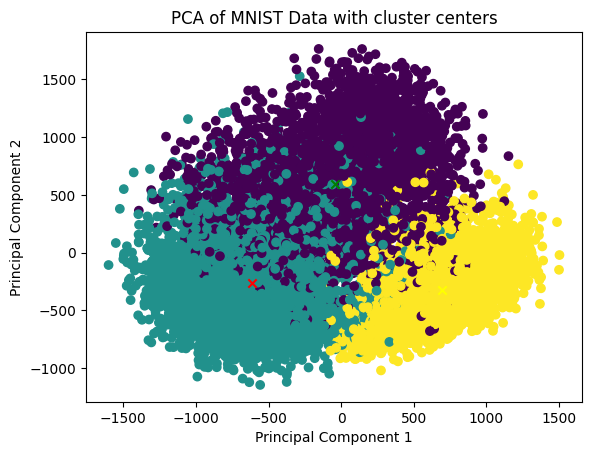

Distances centroid from train set: (853.8089451949772, 1211.1186051720551, 1529.2700659705258)


In [694]:
import matplotlib.pyplot as plt
def visualize_3d():
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(Zk_train[0, :], Zk_train[1, :], Zk_train[2, :], c=Ytrain, label="Data Points")
  ax.scatter(cx1[0], cx1[1], cx1[2], marker='x', color='red', label="Cluster 1")
  ax.scatter(cx2[0], cx2[1], cx2[2], marker='x', color='green', label="Cluster 2")
  ax.scatter(cx3[0], cx3[1], cx3[2], marker='x', color='yellow', label="Cluster 3")
  ax.set_title("PCA of MNIST Data with Cluster Centers (3D)")
  ax.set_xlabel("Principal Component 1")
  ax.set_ylabel("Principal Component 2")
  ax.set_zlabel("Principal Component 3")
  plt.show()

if k==2: visualize_2d()
elif k==3 : visualize_3d()

# Compute, for each cluster, the average distance from the centroid.
def get_distance(data, point):
  dist = []
  for item in data.T:
    dist.append(np.linalg.norm(item - point[:, np.newaxis]))
  return np.mean(dist)

d1 = get_distance(Zk1_train, cx1)
d2 = get_distance(Zk2_train, cx2)
d3 = get_distance(Zk3_train, cx3)
print(f'Distances centroid from train set: {d1, d2, d3}')

In [695]:
def PCA_test(X, U, k):
    cx = centroid(X)
    Xc = X - cx
    Uk = U[:, :k]
    Zk = Uk.T @ Xc
    return Zk

Zk_test = PCA_test(Xtest, U, k)

Zk1_test, _ = split(Zk_test, Ytest, a)
Zk2_test, _ = split(Zk_test, Ytest, b)
Zk3_test, _ = split(Zk_test, Ytest, c)

cx1_test = centroid(Zk1_test)
cx2_test = centroid(Zk2_test)
cx3_test = centroid(Zk3_test)

d1 = get_distance(Zk1_test, cx1)
d2 = get_distance(Zk2_test, cx2)
d3 = get_distance(Zk3_test, cx3)
print(f'Distances centroid from test set: {d1, d2, d3}')

Distances centroid from test set: (835.4714261639125, 1213.8995137742188, 1540.3081074324252)


In [696]:
def find_cluster(x):
    d1 = np.linalg.norm(x - cx1, 2)
    d2 = np.linalg.norm(x - cx2, 2)
    d3 = np.linalg.norm(x - cx3, 2)
    mind = np.min([d1, d2, d3])
    if mind == d1: return a
    elif mind == d2: return b
    else: return c

def accuracy(Y):
    pred = 0
    for i in range(len(Y)):
        if find_cluster(Zk_test[:, i]) != Y[i] :
            pred +=1
    return 1-pred/len(Y)

def accuracy_train(Y):
    pred = 0
    for i in range(len(Y)):
        if find_cluster(Zk_train[:, i]) != Y[i] :
            pred +=1
    return 1-pred/len(Y)

print(accuracy(Ytest))

print(accuracy_train(Ytrain))

0.6309523809523809
0.6298611111111111
